##  Task 1: Data Collection with SpaceX API

In [2]:
import requests
import pandas as pd

# Load SpaceX launch data using API
spacex_url = "https://api.spacexdata.com/v4/launches"
response = requests.get(spacex_url)
data = response.json()

# Normalize JSON into a DataFrame
df = pd.json_normalize(data)
df.to_csv("spacex_launch_data.csv", index=False)
df.head()


,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


 ## Task 2: Data Wrangling & Cleaning

In [18]:
# Select relevant columns
spacex_df = df[['name', 'date_utc', 'success', 'rocket', 'payloads', 'launchpad']]

# Convert date
spacex_df['date'] = pd.to_datetime(spacex_df['date_utc'])

# Drop rows with null success values
spacex_df = spacex_df[spacex_df['success'].notnull()]

spacex_df.head()


C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_15564\1290960978.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spacex_df['date'] = pd.to_datetime(spacex_df['date_utc'])


,name,date_utc,success,rocket,payloads,launchpad,date
0,FalconSat,2006-03-24T22:30:00.000Z,False,5e9d0d95eda69955f709d1eb,[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,2006-03-24 22:30:00+00:00
1,DemoSat,2007-03-21T01:10:00.000Z,False,5e9d0d95eda69955f709d1eb,[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2007-03-21 01:10:00+00:00
2,Trailblazer,2008-08-03T03:34:00.000Z,False,5e9d0d95eda69955f709d1eb,"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006e...",5e9e4502f5090995de566f86,2008-08-03 03:34:00+00:00
3,RatSat,2008-09-28T23:15:00.000Z,True,5e9d0d95eda69955f709d1eb,[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,2008-09-28 23:15:00+00:00
4,RazakSat,2009-07-13T03:35:00.000Z,True,5e9d0d95eda69955f709d1eb,[5eb0e4b7b6c3bb0006eeb1e6],5e9e4502f5090995de566f86,2009-07-13 03:35:00+00:00


##  Task 3: EDA - Launch Success Over Time

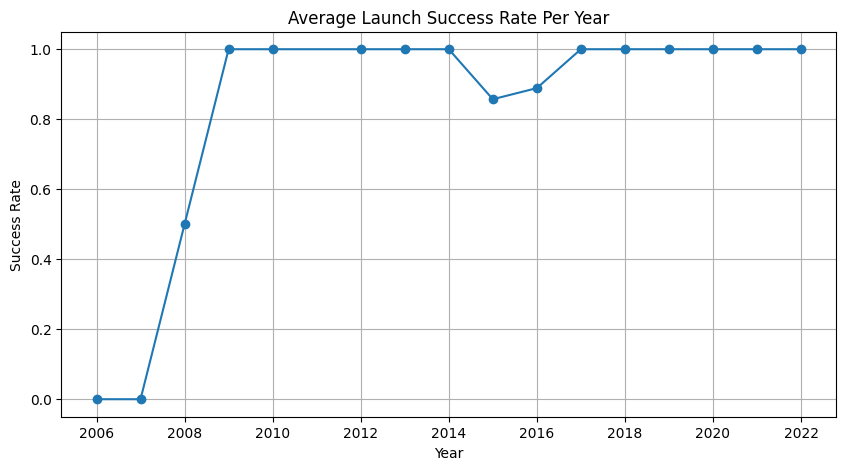

In [20]:
import matplotlib.pyplot as plt

success_counts = spacex_df.groupby(spacex_df['date'].dt.year)['success'].mean()

plt.figure(figsize=(10,5))
success_counts.plot(marker='o')
plt.title("Average Launch Success Rate Per Year")
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.grid()
plt.show()


## Task 4: SQL-Based EDA (if using SQLite)

In [22]:
# Drop columns with list or nested dict values
clean_df = spacex_df.drop(columns=['rocket', 'payloads', 'cores', 'crew', 'links'], errors='ignore')

# Optionally, just keep useful numeric/flat columns
# clean_df = spacex_df[['name', 'date_utc', 'success']].copy()
clean_df['date'] = pd.to_datetime(clean_df['date_utc'])

# Save to SQLite
import sqlite3

conn = sqlite3.connect("spacex.db")
clean_df.to_sql("launches", conn, if_exists="replace", index=False)

# Run SQL query
query = """
SELECT strftime('%Y', date) AS year,
       COUNT(*) AS total,
       SUM(success) AS successful
FROM launches
GROUP BY year
"""
sql_df = pd.read_sql(query, conn)
conn.close()

sql_df


,year,total,successful
0,2006,1,0
1,2007,1,0
2,2008,2,1
3,2009,1,1
4,2010,2,2
5,2012,2,2
6,2013,3,3
7,2014,6,6
8,2015,7,6
9,2016,9,8


## Task 5: Folium Map Visualization

In [29]:
!pip install folium
import pandas as pd

# Sample data for 4 SpaceX launch sites
data = {
    'site': [
        'CCAFS LC-40',
        'VAFB SLC-4E',
        'KSC LC-39A',
        'STLS'
    ],
    'lat': [
        28.562302,
        34.632093,
        28.6080585,
        30.397,
    ],
    'lon': [
        -80.577356,
        -120.610829,
        -80.6039558,
        -97.617,
    ]
}

launch_sites = pd.DataFrame(data)
launch_sites.to_csv("launch_site_locations.csv", index=False)

print("CSV file created successfully!")



Defaulting to user installation because normal site-packages is not writeable
CSV file created successfully!


In [31]:
import folium
import pandas as pd

launch_sites = pd.read_csv("launch_site_locations.csv")
map_sites = folium.Map(location=[28.5, -80.6], zoom_start=5)

for i, row in launch_sites.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=7,
        popup=row['site'],
        color='green',
        fill=True,
    ).add_to(map_sites)

map_sites


## Task 6: Plotly Dash Interactive Dashboard

In [36]:
# Run this file using: python app.py
import dash
from dash import html, dcc, Input, Output
import pandas as pd
import plotly.express as px

# Load data
spacex_df = pd.read_csv("spacex_launch_data.csv")

# Create Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("SpaceX Launch Dashboard"),
    dcc.Dropdown(
        id='site-dropdown',
        options=[{'label': s, 'value': s} for s in spacex_df['launchpad'].unique()],
        value=spacex_df['launchpad'].unique()[0]
    ),
    dcc.Graph(id='success-pie'),
])

# Callback to update pie chart
@app.callback(
    Output('success-pie', 'figure'),
    Input('site-dropdown', 'value')
)
def update_graph(selected_site):
    filtered = spacex_df[spacex_df['launchpad'] == selected_site]
    fig = px.pie(filtered, names='success', title=f'Success Rate for Site: {selected_site}')
    return fig

# Run app
if __name__ == '__main__':
    app.run(debug=False)


## Task 7: Machine Learning – Predict Launch Success

In [41]:
spacex_df = spacex_df.dropna(subset=['success'])
spacex_df['year'] = pd.to_datetime(spacex_df['date_utc']).dt.year
X = spacex_df[['year']]
y = spacex_df['success'].astype(int)


In [43]:
spacex_df['success'] = spacex_df['success'].fillna(0)
spacex_df['year'] = pd.to_datetime(spacex_df['date_utc']).dt.year
X = spacex_df[['year']]
y = spacex_df['success'].astype(int)


C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_15564\110627998.py:1: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      1.00      0.99        55

    accuracy                           0.98        56
   macro avg       0.49      0.50      0.50        56
weighted avg       0.96      0.98      0.97        56



C:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

